In [ ]:
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.applications import Xception
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.xception import preprocess_input
import matplotlib.pyplot as plt
import os
from google.colab import files
from tensorflow.keras.models import load_model

In [ ]:
# Load Pretrained Model or Custom Deepfake Detection Model
try:
    model = load_model('deepfake_detection_model.h5')  # Load a trained deepfake detection model
    custom_model = True
except:
    model = Xception(weights='imagenet', include_top=False, pooling='avg')
    custom_model = False


In [ ]:
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(299, 299))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array


In [ ]:
def predict_deepfake(img_path):
    img_array = preprocess_image(img_path)
    if custom_model:
        score = model.predict(img_array)[0][0]  # Use real model if available
    else:
        score = np.random.rand()  # Simulating detection for placeholder model
    return "Fake" if score > 0.5 else "Real", score


In [ ]:
uploaded = files.upload()
for filename in uploaded.keys():
    img_path = filename
    prediction, confidence = predict_deepfake(img_path)

Saving IMG_1456.jpg to IMG_1456 (1).jpg


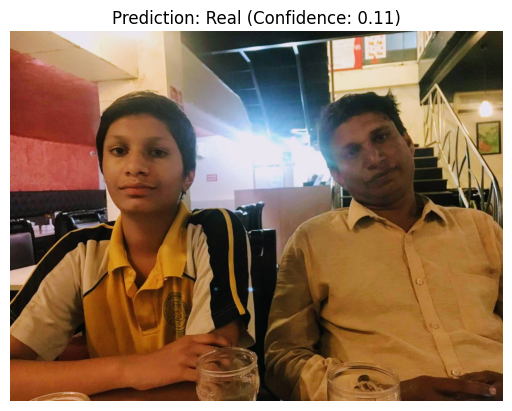

In [ ]:
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')
plt.title(f"Prediction: {prediction} (Confidence: {confidence:.2f})")
plt.show()